### Importing Libraries

In [1]:
import yfinance as yf
from yahoo_fin import stock_info as si
import random
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import datetime
from scipy.stats import norm
import scipy
from IPython.display import Markdown
import seaborn as sns

/var/folders/9g/q1btgy0d1cx10571fvpjrsz80000gn/T/ipykernel_3323/2129515529.py:9: UserWarning: A NumPy version >=1.25.2 and <2.6.0 is required for this version of SciPy (detected version 1.24.3)
  from scipy.stats import norm


## Choosing stocks :

### 3 portfolios each with 5 different stocks from different industries and all equally weighted

#### Portfolio 1:
 ##### - NVIDIA, Ford, Plug Power, SoundHound, Nu Holdings

#### Portfolio 2:
 ##### - Netflix, QuantumScape, Baytex Energy Corp, Bath and Body Works, CleanSpark Inc


#### Portfolio 3:
 ##### - Amazon, Apple, Pfizer, Hecla Mining Company, New Gold Inc

In [2]:
port1 = ['NVDA', 'F', 'PLUG', 'SOUN', 'NU' ]
port2 = ['NFLX', 'QS', 'BTE', 'BBWI', 'CLSK']
port3 = ['AMZN', 'AAPL', 'PFE', 'HL', 'NGD']

#### Calculating daily returns for each portfolio

In [3]:
period = 5

In [4]:
daily_returns_port1 = yf.download(port1, period=f'{period}y', auto_adjust = True)["Close"].pct_change().dropna()
daily_returns_port2 = yf.download(port2, period=f'{period}y', auto_adjust = True)["Close"].pct_change().dropna()
daily_returns_port3 = yf.download(port3, period=f'{period}y', auto_adjust = True)["Close"].pct_change().dropna()


[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed


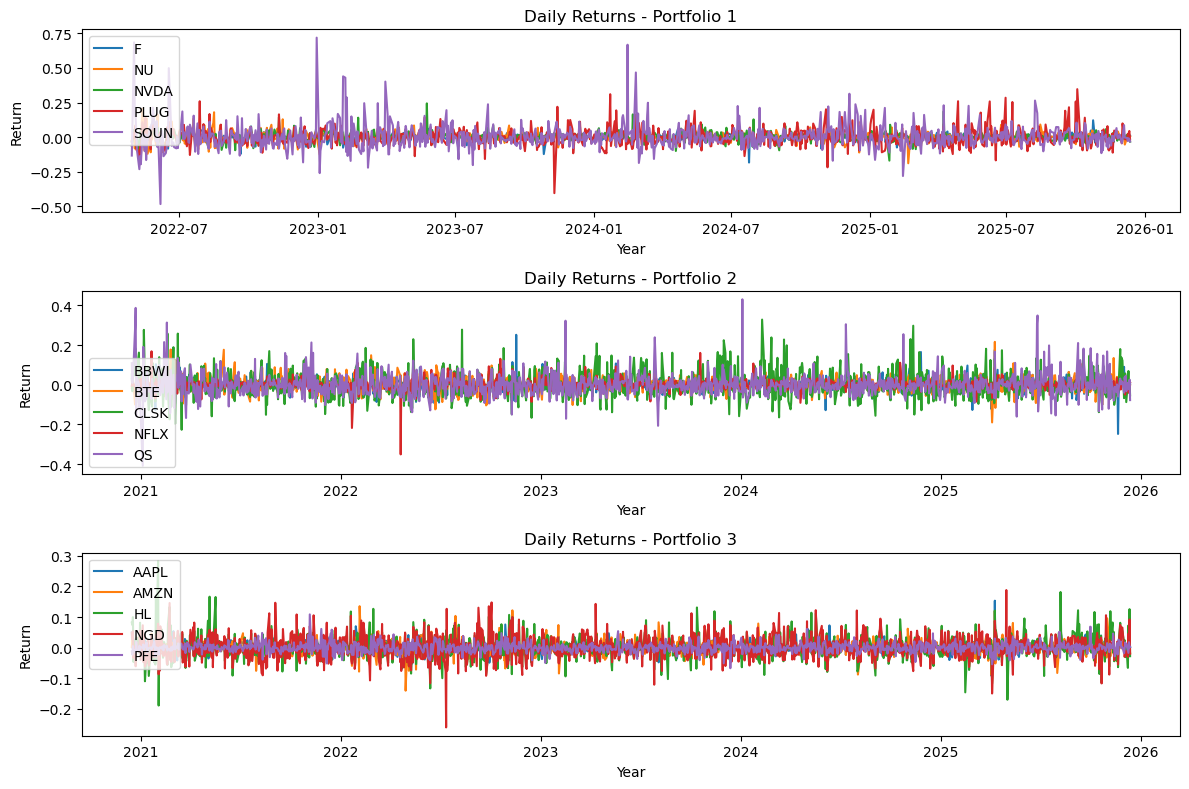

In [5]:
plt.figure(figsize=(12, 8))

# --- Subplot 1: Portfolio 1 ---
plt.subplot(3, 1, 1)
for column in daily_returns_port1.columns:
    plt.plot(daily_returns_port1.index, daily_returns_port1[column], label=column)

plt.title("Daily Returns - Portfolio 1")
plt.xlabel("Year")
plt.ylabel("Return")
plt.legend()

# --- Subplot 2: Portfolio 2 ---
plt.subplot(3, 1, 2)
for column in daily_returns_port2.columns:
    plt.plot(daily_returns_port2.index, daily_returns_port2[column], label=column)

plt.title("Daily Returns - Portfolio 2")
plt.xlabel("Year")
plt.ylabel("Return")
plt.legend()

# --- Subplot 3: Portfolio 3 ---
plt.subplot(3, 1, 3)
for column in daily_returns_port3.columns:
    plt.plot(daily_returns_port3.index, daily_returns_port3[column], label=column)

plt.title("Daily Returns - Portfolio 3")
plt.xlabel("Year")
plt.ylabel("Return")
plt.legend()

plt.tight_layout()
plt.show()


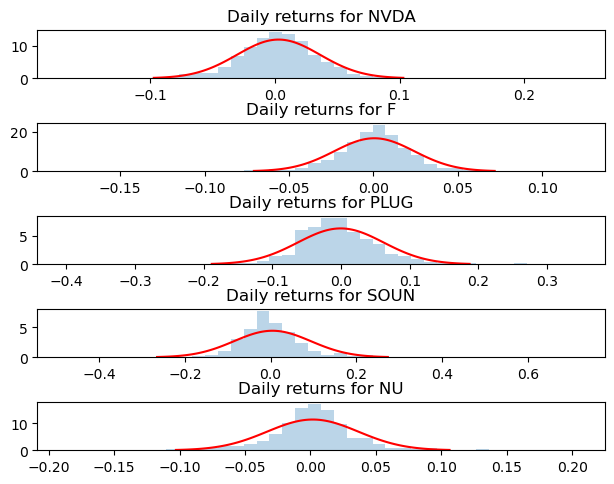

In [6]:
# Portfolio 1
fig, axes = plt.subplots(nrows=5, ncols=1)
fig.tight_layout() 

for i, ticker in enumerate(port1):
  # New subplot for each stock
  plt.subplot(5, 1, i + 1)
  plt.title(f"Daily returns for {ticker}")

  # Histogram of returns
  plt.hist(daily_returns_port1[ticker], bins=40, density=True, histtype='stepfilled', alpha=0.3)

  # Standard normal for stock returns
  mean = daily_returns_port1[ticker].mean()
  std_dev = daily_returns_port1[ticker].std()
  x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
  plt.plot(x, scipy.stats.norm.pdf(x, mean, std_dev),"r")

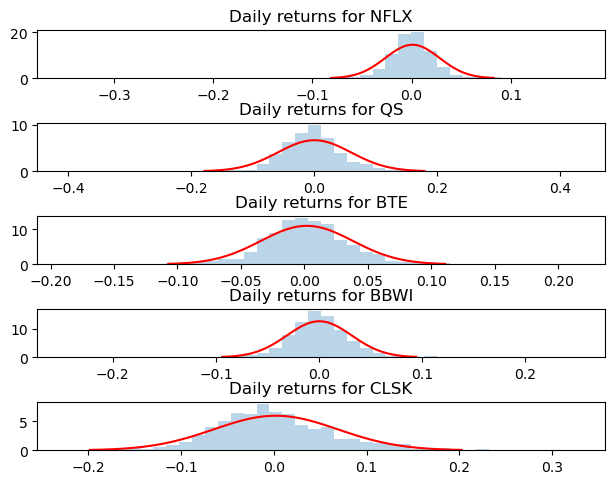

In [7]:
# Portfolio 2
fig, axes = plt.subplots(nrows=5, ncols=1)
fig.tight_layout() 

for i, ticker in enumerate(port2):
  # New subplot for each stock
  plt.subplot(5, 1, i + 1)
  plt.title(f"Daily returns for {ticker}")

  # Histogram of returns
  plt.hist(daily_returns_port2[ticker], bins=40, density=True, histtype='stepfilled', alpha=0.3)

  # Standard normal for stock returns
  mean = daily_returns_port2[ticker].mean()
  std_dev = daily_returns_port2[ticker].std()
  x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
  plt.plot(x, scipy.stats.norm.pdf(x, mean, std_dev),"r")

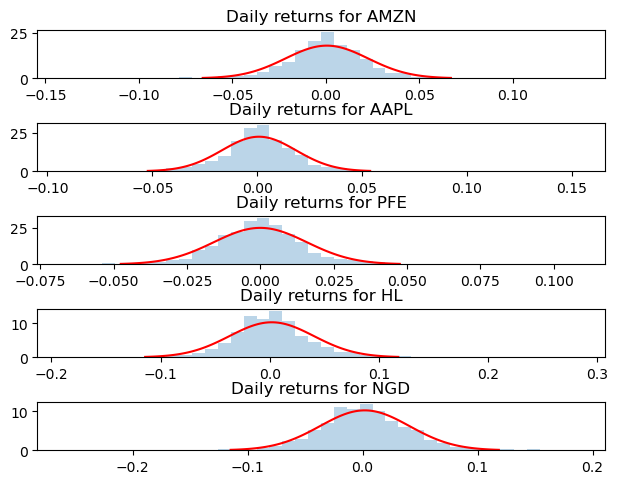

In [8]:
# Portfolio 3
fig, axes = plt.subplots(nrows=5, ncols=1)
fig.tight_layout() 

for i, ticker in enumerate(port3):
  # New subplot for each stock
  plt.subplot(5, 1, i + 1)
  plt.title(f"Daily returns for {ticker}")

  # Histogram of returns
  plt.hist(daily_returns_port3[ticker], bins=40, density=True, histtype='stepfilled', alpha=0.3)

  # Standard normal for stock returns
  mean = daily_returns_port3[ticker].mean()
  std_dev = daily_returns_port3[ticker].std()
  x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
  plt.plot(x, scipy.stats.norm.pdf(x, mean, std_dev),"r")

#### Analysis of the stock histograms suggests that they approximately follow a normal distribution, with a few outliers present.

### Correlation between assets for each portfolio 

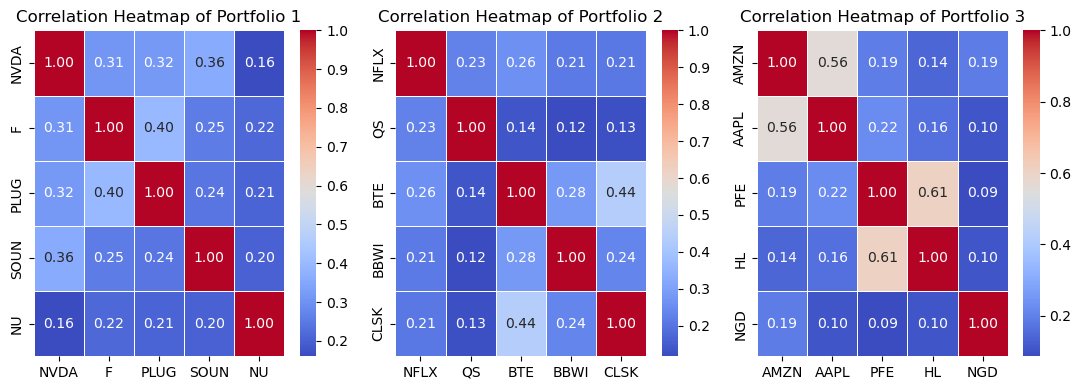

In [9]:
corr_1 = daily_returns_port1.corr()
corr_2 = daily_returns_port2.corr()

corr_3 = daily_returns_port3.corr()


correlation_matrices = [corr_1, corr_2, corr_3]
plt.figure(figsize=(11, 4))
tickers_list = [port1, port2, port3]

for i in range(3):
    plt.subplot(1, 3, i+1)
    correlation_matrices_array = np.array(correlation_matrices[i])
    sns.heatmap(correlation_matrices_array, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5,
                xticklabels=tickers_list[i], yticklabels=tickers_list[i])
    plt.title(f'Correlation Heatmap of Portfolio {i + 1}')
    
plt.tight_layout()
plt.show()

In [10]:
n = len(port1)
weights = [1/n]*n
portfolio_value = 1000000
weights = np.array(weights)
print(weights)

[0.2 0.2 0.2 0.2 0.2]


In [11]:
annual_return_1 = ((1 + daily_returns_port1.dot(weights).mean()) ** 252 ) - 1
annual_return_2 = ((1 + daily_returns_port2.dot(weights).mean()) ** 252 ) - 1
annual_return_3 = ((1 + daily_returns_port3.dot(weights).mean()) ** 252 ) - 1

volatility_1 = np.sqrt(weights.T.dot(daily_returns_port1.cov())).dot(weights) * np.sqrt(252)
volatility_2 = np.sqrt(weights.T.dot(daily_returns_port2.cov())).dot(weights) * np.sqrt(252)
volatility_3 = np.sqrt(weights.T.dot(daily_returns_port3.cov())).dot(weights) * np.sqrt(252)

print(f"The annual return for portfolio 1 is {round(annual_return_1*100, 4)}%")
print(f"The annual return for portfolio 2 is {round(annual_return_2*100, 4)}%")
print(f"The annual return for portfolio 3 is {round(annual_return_3*100, 4)}%")
print()
print(f"The annual volatility for portfolio 1 is {round(volatility_1*100, 4)}%")
print(f"The annual volatility for portfolio 2 is {round(volatility_2*100, 4)}%")
print(f"The annual volatility for portfolio 3 is {round(volatility_3*100, 4)}%")

The annual return for portfolio 1 is 55.8158%
The annual return for portfolio 2 is 32.448%
The annual return for portfolio 3 is 28.8211%

The annual volatility for portfolio 1 is 48.2967%
The annual volatility for portfolio 2 is 43.7015%
The annual volatility for portfolio 3 is 26.6353%


### Sharpe Ratio

#### The U.S. 3-month Treasury bill yield is used as the risk-free rate because it is the standard benchmark for U.S. dollar–denominated portfolios, offering a highly liquid, virtually risk-free return that aligns with the short-term horizon of daily portfolio returns.

In [12]:
rf = yf.download("^IRX", period="1y")["Close"].iloc[-1] / 100 
rf_daily = (1 + rf)**(1/252) - 1 
rf_daily = float(rf_daily) 
print(rf_daily)

/var/folders/9g/q1btgy0d1cx10571fvpjrsz80000gn/T/ipykernel_3323/3965757920.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  rf = yf.download("^IRX", period="1y")["Close"].iloc[-1] / 100
[*********************100%***********************]  1 of 1 completed

0.00013748145115588528



/var/folders/9g/q1btgy0d1cx10571fvpjrsz80000gn/T/ipykernel_3323/3965757920.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rf_daily = float(rf_daily)


In [13]:
simple_cov_port_1 = daily_returns_port1.cov()
simple_cov_port_2 = daily_returns_port2.cov()
simple_cov_port_3 = daily_returns_port3.cov()


def sharpe_ratio(weights, simple_returns, covariance, risk_free_rate):
    return (simple_returns.dot(weights).mean() - risk_free_rate ) / standard_deviation(weights, covariance )

In [15]:
def standard_deviation(weights, cov_matrix):
    return np.sqrt(weights.T.dot(cov_matrix).dot(weights))

In [16]:
sharpe_port1 = round(sharpe_ratio(weights, daily_returns_port1, simple_cov_port_1, rf_daily ), 6)
sharpe_port2 = round(sharpe_ratio(weights, daily_returns_port2, simple_cov_port_2, rf_daily ), 6)
sharpe_port3 = round(sharpe_ratio(weights, daily_returns_port3, simple_cov_port_3, rf_daily ), 6)

print(f"The annualised Sharpe Ratio for Portfolio 1 is {sharpe_port1*np.sqrt(252)}.")
print(f"The annualised Sharpe Ratio for Portfolio 2 is {sharpe_port2*np.sqrt(252)}.")
print(f"The annualised Sharpe Ratio for Portfolio 3 is {sharpe_port3*np.sqrt(252)}.")

The annualised Sharpe Ratio for Portfolio 1 is 0.8069964818956772.
The annualised Sharpe Ratio for Portfolio 2 is 0.5410349771022203.
The annualised Sharpe Ratio for Portfolio 3 is 0.7776921403743258.


## Converting returns to log returns 

In [17]:
def daily_to_log_returns(daily_returns):
    return np.log(1 + daily_returns)

In [18]:
log_returns_port1 = daily_to_log_returns(daily_returns_port1)
log_returns_port2 = daily_to_log_returns(daily_returns_port2)
log_returns_port3 = daily_to_log_returns(daily_returns_port3)

### Calculating VaR - Variance-Covariance method
#### Value at Risk is the maximum expected loss on an investment over a given period at a chosen confidence level

#### Portfolio means (Historical Portfolio returns)

In [19]:
# Daily log returns for each portfolio
port1_daily_log_returns = log_returns_port1.dot(weights)
port2_daily_log_returns= log_returns_port2.dot(weights)
port3_daily_log_returns = log_returns_port3.dot(weights)


#### Covariance for each portfolio

In [20]:
port1_cov = log_returns_port1.cov()
port2_cov = log_returns_port2.cov()
port3_cov = log_returns_port3.cov()

print(f"The log of the covarinace matrix of portfolio 1 is : \n {port1_cov}")
print()
print(f"The log of the covarinace matrix of portfolio 2 is : \n {port2_cov}")
print()
print(f"The log of the covarinace matrix of portfolio 3 is : \n {port3_cov}")

The log of the covarinace matrix of portfolio 1 is : 
 Ticker         F        NU      NVDA      PLUG      SOUN
Ticker                                                  
F       0.000577  0.000256  0.000248  0.000528  0.000338
NU      0.000256  0.001217  0.000464  0.000556  0.000698
NVDA    0.000248  0.000464  0.001093  0.000499  0.000613
PLUG    0.000528  0.000556  0.000499  0.003838  0.001103
SOUN    0.000338  0.000698  0.000613  0.001103  0.007167

The log of the covarinace matrix of portfolio 2 is : 
 Ticker      BBWI       BTE      CLSK      NFLX        QS
Ticker                                                  
BBWI    0.000986  0.000259  0.000536  0.000183  0.000385
BTE     0.000259  0.001310  0.000337  0.000114  0.000260
CLSK    0.000536  0.000337  0.004299  0.000515  0.001738
NFLX    0.000183  0.000114  0.000515  0.000796  0.000399
QS      0.000385  0.000260  0.001738  0.000399  0.003419

The log of the covarinace matrix of portfolio 3 is : 
 Ticker      AAPL      AMZN        H

#### Calculating volatilty (standard deviation)

In [21]:
portfolio_sigma_1 = standard_deviation(weights, port1_cov)
portfolio_sigma_2 = standard_deviation(weights, port2_cov)
portfolio_sigma_3 = standard_deviation(weights, port3_cov)


print(f"Returns volatility for portfolio 1: {np.round(portfolio_sigma_1*100,3)}%")
print(f"Returns volatility for portfolio 2: {np.round(portfolio_sigma_2*100,3)}%")
print(f"Returns volatility for portfolio 3: {np.round(portfolio_sigma_3*100,3)}%")

Returns volatility for portfolio 1: 3.13%
Returns volatility for portfolio 2: 2.847%
Returns volatility for portfolio 3: 1.767%


#### Calculating VaR 
#### Using a 95% confidence level:

In [22]:
def value_at_risk_cov_var_method(portfolio_value, standard_deviation, log_returns, alpha):
    return (log_returns.mean() + standard_deviation * norm.ppf(alpha))*(-1)

In [23]:
alpha = 0.05
portfolio_value = 100000

log_VaR_port1 = value_at_risk_cov_var_method(portfolio_value, portfolio_sigma_1, port1_daily_log_returns, alpha)
log_VaR_port2 = value_at_risk_cov_var_method(portfolio_value, portfolio_sigma_2, port2_daily_log_returns, alpha)
log_VaR_port3 = value_at_risk_cov_var_method(portfolio_value, portfolio_sigma_3, port3_daily_log_returns, alpha)

VaR_simple_port1 = round(portfolio_value * (1 - np.exp(-log_VaR_port1)), 4)
VaR_simple_port2 = round(portfolio_value * (1 - np.exp(-log_VaR_port2)), 4)
VaR_simple_port3 = round(portfolio_value * (1 - np.exp(-log_VaR_port3)), 4)

print(f"There is a {int(alpha*100)}% chance that portfolio 1 will lose more than ${VaR_simple_port1} in a single day.")
print(f"There is a {int(alpha*100)}% chance that portfolio 2 will lose more than ${VaR_simple_port2} in a single day.")
print(f"There is a {int(alpha*100)}% chance that portfolio 3 will lose more than ${VaR_simple_port3} in a single day.")

There is a 5% chance that portfolio 1 will lose more than $4985.222 in a single day.
There is a 5% chance that portfolio 2 will lose more than $4571.9144 in a single day.
There is a 5% chance that portfolio 3 will lose more than $2806.8669 in a single day.


In [24]:
dictt = {
    "portfolio 1" : VaR_simple_port1,
    "portfolio 2" : VaR_simple_port1,
    "portfolio 3" : VaR_simple_port3
} 

low_risk_portfolio = min(dictt, key=dictt.get)
high_risk_portfolio = max(dictt, key=dictt.get)

low_risk_value = dictt[low_risk_portfolio]
high_risk_value = dictt[high_risk_portfolio]


print(f"The lowest risk portfolio is {low_risk_portfolio} and the highest risk portfolio is {high_risk_portfolio}.")

The lowest risk portfolio is portfolio 3 and the highest risk portfolio is portfolio 1.


### Calculating VAR - Monte Carlo Method method

In [25]:
def random_z_score():
    return np.random.normal(0,1)

def scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, log_returns):
    return portfolio_value * log_returns.mean() + portfolio_value * portfolio_std_dev * z_score

In [26]:
simulations = 10000
confidence_interval = 0.95

#### Portfolio 1

In [27]:
scenarioReturn_1 = []


for i in range(simulations):
    z_score = random_z_score()
    scenarioReturn_1.append(scenario_gain_loss(portfolio_value, portfolio_sigma_1, z_score, port1_daily_log_returns))
    
VaR_1 = np.percentile(scenarioReturn_1, 100*(1-confidence_interval))
print(VaR_1)    

-5163.039159822517


#### Portfolio 2

In [28]:
scenarioReturn_2 = []


for i in range(simulations):
    z_score = random_z_score()
    scenarioReturn_2.append(scenario_gain_loss(portfolio_value, portfolio_sigma_2, z_score, port2_daily_log_returns))
    
VaR_2 = np.percentile(scenarioReturn_2, 100*(1-confidence_interval))
print(VaR_2)    

-4711.147923342545


#### Portfolio 3

In [29]:
scenarioReturn_3 = []


for i in range(simulations):
    z_score = random_z_score()
    scenarioReturn_3.append(scenario_gain_loss(portfolio_value, portfolio_sigma_3, z_score, port3_daily_log_returns))
    
VaR_3 = np.percentile(scenarioReturn_3, 100*(1-confidence_interval))
print(VaR_3)  

-2850.9716282920404


In [30]:
print(f"There is a {int(alpha*100)}% chance that portfolio 1 will lose more than R{round(VaR_1*(-1), 4)} in a single day.")
print(f"There is a {int(alpha*100)}% chance that portfolio 2 will lose more than R{round(VaR_2*(-1), 4)} in a single day.")
print(f"There is a {int(alpha*100)}% chance that portfolio 3 will lose more than R{round(VaR_3*(-1), 4)} in a single day.")

There is a 5% chance that portfolio 1 will lose more than R5163.0392 in a single day.
There is a 5% chance that portfolio 2 will lose more than R4711.1479 in a single day.
There is a 5% chance that portfolio 3 will lose more than R2850.9716 in a single day.


In [31]:
dictt = {
    "portfolio 1" : VaR_1*(-1),
    "portfolio 2" : VaR_1*(-1),
    "portfolio 3" : VaR_3*(-1)
} 

low_risk_portfolio = min(dictt, key=dictt.get)
high_risk_portfolio = max(dictt, key=dictt.get)

low_risk_value = dictt[low_risk_portfolio]
high_risk_value = dictt[high_risk_portfolio]


print(f"The lowest risk portfolio is {low_risk_portfolio} and the highest risk portfolio is {high_risk_portfolio}.")

The lowest risk portfolio is portfolio 3 and the highest risk portfolio is portfolio 1.


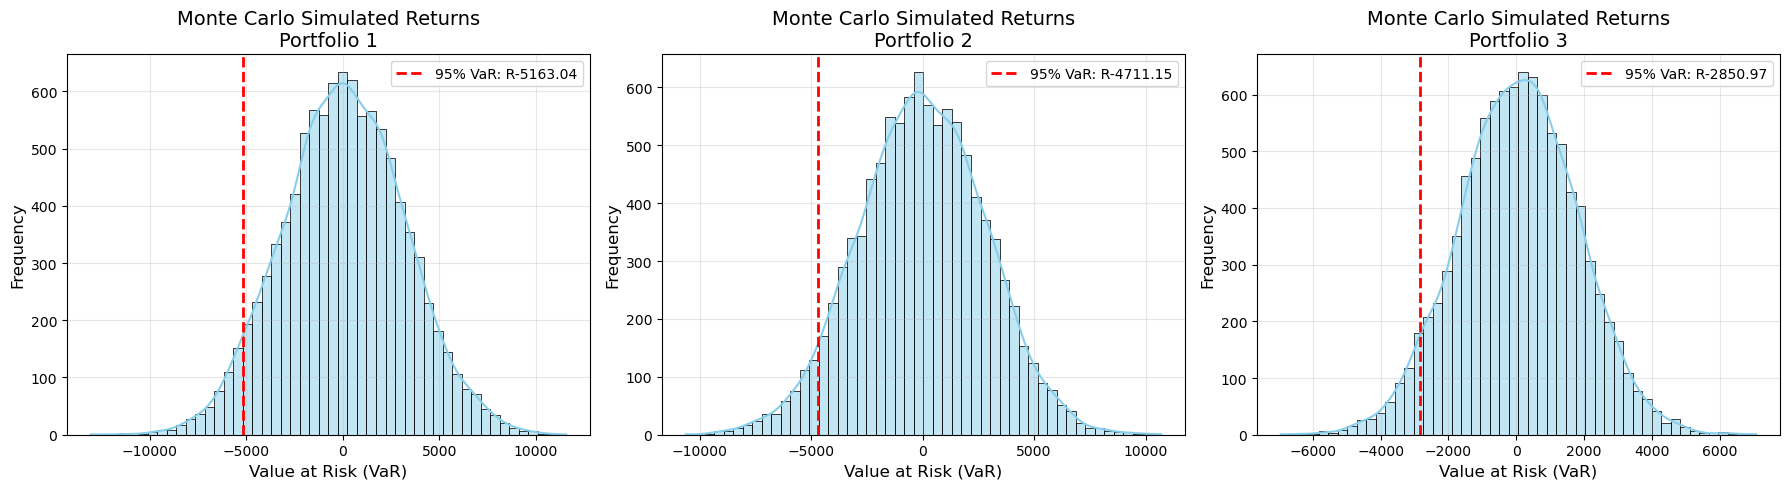

In [32]:
scenario_returns_list = [scenarioReturn_1, scenarioReturn_2, scenarioReturn_3]
VaRs = [VaR_1, VaR_2, VaR_3]
titles = ['Portfolio 1', 'Portfolio 2', 'Portfolio 3']

plt.figure(figsize=(18, 5))  

for i in range(3):
    plt.subplot(1, 3, i+1)
    scenario_returns_array = np.array(scenario_returns_list[i])
    
    sns.histplot(scenario_returns_array, bins=50, kde=True, color='skyblue')
    
    plt.axvline(VaRs[i], color='red', linestyle='--', linewidth=2,
                label=f'{int(confidence_interval*100)}% VaR: R{VaRs[i]:.2f}')
    
    plt.title(f'Monte Carlo Simulated Returns\n{titles[i]}', fontsize=14)
    plt.xlabel('Value at Risk (VaR)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### CVaR

In [33]:
def CVAR(monte_carlo_sims, monte_carlo_var):
    sim_returns = np.array(monte_carlo_sims)
    tail_losses = sim_returns[sim_returns <= -monte_carlo_var]
    return -tail_losses.mean()

CVaR_1 = CVAR(scenarioReturn_1, VaR_1)
CVaR_2 = CVAR(scenarioReturn_1, VaR_2)
CVaR_3 = CVAR(scenarioReturn_1, VaR_3)

print(f"The CVaR/Expected Shortfall is {round(CVaR_1,4)} for portfolio 1.")
print(f"The CVaR/Expected Shortfall is {round(CVaR_2,4)} for portfolio 2.")
print(f"The CVaR/Expected Shortfall is {round(CVaR_3,4)} for portfolio 3.")

The CVaR/Expected Shortfall is 296.4881 for portfolio 1.
The CVaR/Expected Shortfall is 391.0067 for portfolio 2.
The CVaR/Expected Shortfall is 990.9191 for portfolio 3.


# Portfolio Optimization

In [34]:
import numpy as np
from scipy.optimize import minimize

# daily simple returns of portfolio 1
#returns = daily_returns_port1

# covariance matrix
#cov_matrix = simple_cov_port_1

# daily risk-free rate
#rf = rf_daily

# number of assets
n_assets = daily_returns_port1.shape[1]

# Function to calculate negative Sharpe ratio (since we minimize)
def neg_sharpe(weights, returns, cov_matrix, rf):
    port_return = np.dot(weights, returns.mean())
    port_std = np.sqrt(weights.T @ cov_matrix @ weights)
    sharpe = (port_return - rf) / port_std
    return -sharpe  # minimize negative Sharpe

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

bounds = tuple((0, 1) for _ in range(n_assets))

init_guess = np.array(n_assets * [1/n_assets])

# Optimization
opt_results_port_1 = minimize(neg_sharpe, init_guess, args=(daily_returns_port1, simple_cov_port_1, rf_daily),
                       method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights_port_1 = opt_results_port_1.x
max_sharpe_port_1 = -opt_results_port_1.fun

np.set_printoptions(suppress=True, precision=5) 

print("Optimal weights:", optimal_weights_port_1 )
print("Maximum Sharpe ratio (daily):", max_sharpe_port_1)
print("Maximum Sharpe ratio (annualized):", max_sharpe_port_1 * np.sqrt(252))


Optimal weights: [0.      0.09581 0.79547 0.      0.10872]
Maximum Sharpe ratio (daily): 0.0892937030171479
Maximum Sharpe ratio (annualized): 1.4174935909645874


In [35]:
# Optimization
opt_results_port_2 = minimize(neg_sharpe, init_guess, args=(daily_returns_port2, simple_cov_port_2, rf_daily),
                       method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights_port_2 = opt_results_port_2.x
max_sharpe_port_2 = -opt_results_port_2.fun

np.set_printoptions(suppress=True, precision=5) 

print("Optimal weights:", optimal_weights_port_2 )
print("Maximum Sharpe ratio (daily):", max_sharpe_port_2)
print("Maximum Sharpe ratio (annualized):", max_sharpe_port_2 * np.sqrt(252))


Optimal weights: [0.      0.58969 0.12633 0.28397 0.     ]
Maximum Sharpe ratio (daily): 0.05662286659092746
Maximum Sharpe ratio (annualized): 0.8988601411150905


In [36]:
# Optimization
opt_results_port_3 = minimize(neg_sharpe, init_guess, args=(daily_returns_port3, simple_cov_port_3, rf_daily),
                       method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights_port_3 = opt_results_port_3.x
max_sharpe_port_3 = -opt_results_port_3.fun

np.set_printoptions(suppress=True, precision=5) 

print("Optimal weights:", optimal_weights_port_3 )
print("Maximum Sharpe ratio (daily):", max_sharpe_port_3)
print("Maximum Sharpe ratio (annualized):", max_sharpe_port_3 * np.sqrt(252))


Optimal weights: [0.59082 0.      0.17321 0.23597 0.     ]
Maximum Sharpe ratio (daily): 0.05794209175324332
Maximum Sharpe ratio (annualized): 0.91980219133181


In [37]:
annual_return_1 = ((1 + daily_returns_port1.dot(optimal_weights_port_1).mean()) ** 252 ) - 1
annual_return_2 = ((1 + daily_returns_port2.dot(optimal_weights_port_2).mean()) ** 252 ) - 1
annual_return_3 = ((1 + daily_returns_port3.dot(optimal_weights_port_3).mean()) ** 252 ) - 1

volatility_1 = np.sqrt(optimal_weights_port_1.T.dot(daily_returns_port1.cov())).dot(optimal_weights_port_1) * np.sqrt(252)
volatility_2 = np.sqrt(optimal_weights_port_2.T.dot(daily_returns_port2.cov())).dot(optimal_weights_port_2) * np.sqrt(252)
volatility_3 = np.sqrt(optimal_weights_port_3.T.dot(daily_returns_port3.cov())).dot(optimal_weights_port_3) * np.sqrt(252)

print(f"The annual return for portfolio 1 is {round(annual_return_1*100, 4)}%")
print(f"The annual return for portfolio 2 is {round(annual_return_2*100, 4)}%")
print(f"The annual return for portfolio 3 is {round(annual_return_3*100, 4)}%")
print()
print(f"The annual volatility for portfolio 1 is {round(volatility_1*100, 4)}%")
print(f"The annual volatility for portfolio 2 is {round(volatility_2*100, 4)}%")
print(f"The annual volatility for portfolio 3 is {round(volatility_3*100, 4)}%")

The annual return for portfolio 1 is 110.8399%
The annual return for portfolio 2 is 51.6301%
The annual return for portfolio 3 is 36.884%

The annual volatility for portfolio 1 is 49.9971%
The annual volatility for portfolio 2 is 41.7813%
The annual volatility for portfolio 3 is 29.6442%
